### First,lets load the dataset using pandas

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [7]:
dataframe=pd.read_csv('car.csv')

### Now let's analayze the dataframe,its shape,missing values in each columns,median,mean values of each dataframe and so on

In [8]:
print(dataframe.shape)
print(dataframe.columns)
dataframe.head()

(8128, 12)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [10]:
dataframe.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [11]:
dataframe.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

### Lets fill the missing values.


In [12]:
dataframe['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [13]:
print(dataframe['max_power'].isnull().sum())
print((dataframe['max_power'].str.strip()=='').sum())


215
1


In [14]:
#now lets replace empty strins with NaN
dataframe['max_power']=dataframe['max_power'].replace(' ',np.nan)


#### Because of empty space max_power column was treated as object but values in it are not categorical or object type.so lets convert it to numerical datatype now as we already replace empty values with NaN 

In [15]:
dataframe['max_power'] =dataframe['max_power'].astype(float)

In [16]:
dataframe['max_power'].dtype

dtype('float64')

#### Now lets look after all missing object datatype columns before replacing those values to find suitable values to replace them


In [17]:
for i in dataframe.columns:
   
    print(f'{i} : ({dataframe[i].dtype}) and their respective missing values are ({dataframe[i].isnull().sum()})')

name : (object) and their respective missing values are (0)
year : (int64) and their respective missing values are (0)
selling_price : (int64) and their respective missing values are (0)
km_driven : (int64) and their respective missing values are (0)
fuel : (object) and their respective missing values are (0)
seller_type : (object) and their respective missing values are (0)
transmission : (object) and their respective missing values are (0)
owner : (object) and their respective missing values are (0)
mileage(km/ltr/kg) : (float64) and their respective missing values are (221)
engine : (float64) and their respective missing values are (221)
max_power : (float64) and their respective missing values are (216)
seats : (float64) and their respective missing values are (221)


### Other things looks fine ,now lets check their skewness to fill their values

In [18]:
for i in dataframe.columns:
    if dataframe[i].isnull().sum()>0 :
        print(f'  column ({i}) and their respective skewness is :{dataframe[i].skew()}')

  column (mileage(km/ltr/kg)) and their respective skewness is :-0.14266745404242617
  column (engine) and their respective skewness is :1.1352691298499176
  column (max_power) and their respective skewness is :1.6212607481144414
  column (seats) and their respective skewness is :1.969914080776506


In [19]:
dataframe['mileage(km/ltr/kg)'].fillna(dataframe['mileage(km/ltr/kg)'].mean(),inplace=True)
dataframe['engine'].fillna(dataframe['engine'].median(),inplace=True)
dataframe['max_power'].fillna(dataframe['max_power'].median(),inplace=True)
dataframe['seats'].fillna(dataframe['seats'].median(),inplace=True)



C:\Users\Asus\AppData\Local\Temp\ipykernel_5812\276422383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['mileage(km/ltr/kg)'].fillna(dataframe['mileage(km/ltr/kg)'].mean(),inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5812\276422383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [20]:
dataframe.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

### Assist by LLM:
- I used chatgpt to repalace missing values for different columns like by their median,mean on different conditions like looking skewness of dataset and their nature.
-  Chatgpt also asssist me to understand different unique values associated with various columns ,their meaning and visualizing them

In [21]:
## left blank to seperate section 

# Now,our data is ready for Data Analysis.

### First lets see univariate anlaysis


- first seperate numerical and categorical columns

In [22]:


numerical_columns =dataframe.select_dtypes(include=['int64','float64'])
print(numerical_columns.columns)

categorical_columns =dataframe.select_dtypes(include=['object'])
print(categorical_columns.columns)

Index(['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats'],
      dtype='object')
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


##### First numerical columns for univariate analysis

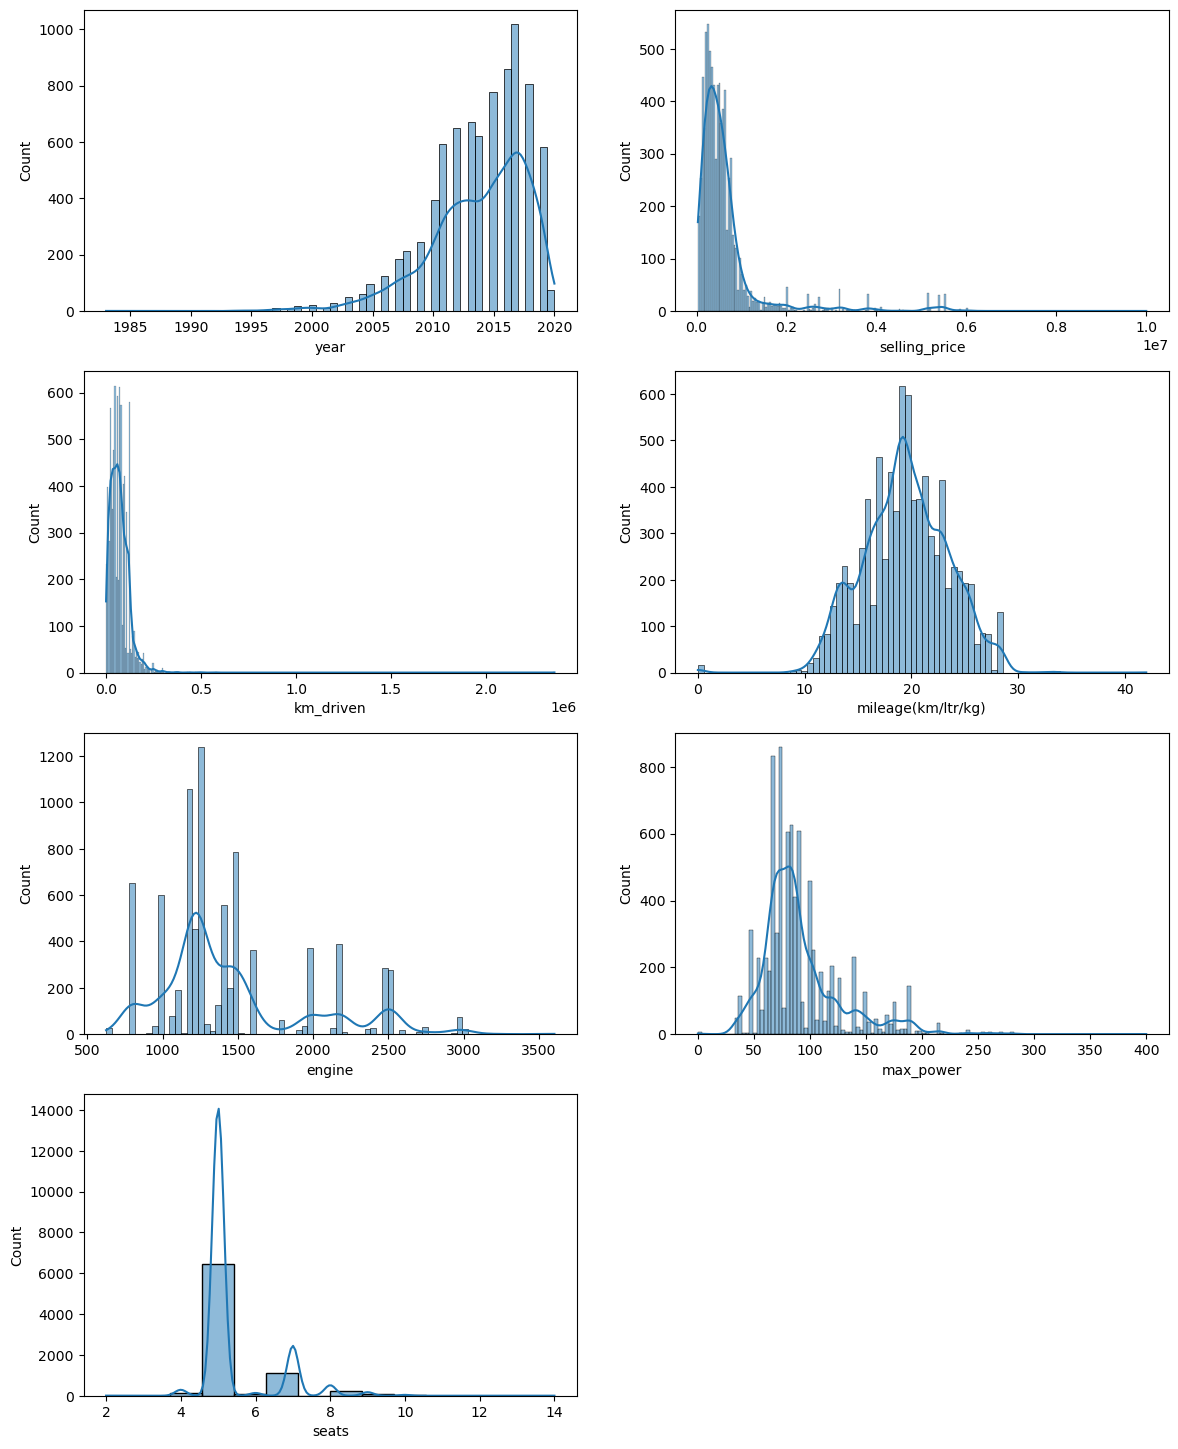

In [23]:
plt.figure(figsize=(14,18))
for i,feature in enumerate(numerical_columns.columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data=dataframe,x=feature,kde=True)

### The above histplot shows following things:
- count of different unique values in each column
- the type of datsets in each column like 
    - normal distribution,right skewed ,left skewed

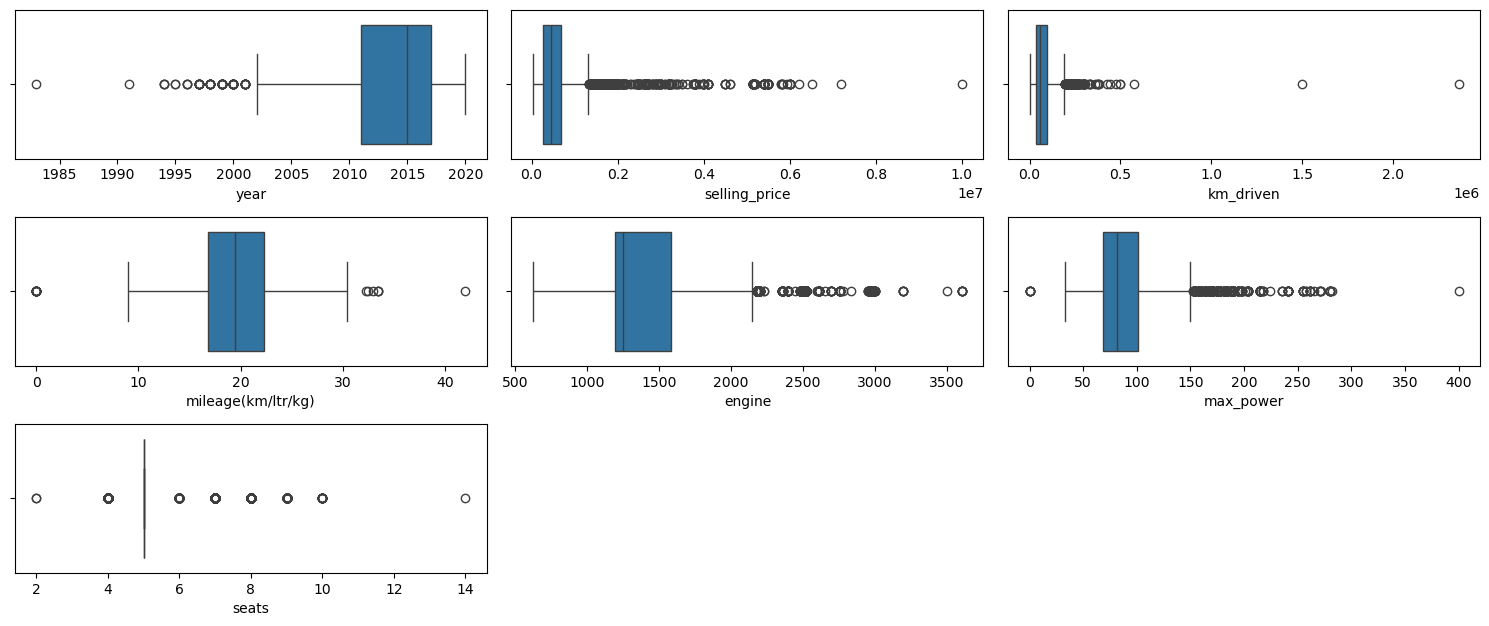

In [24]:
## Now lets see box plot 
plt.figure(figsize=(15,8))
for i,feature in enumerate(numerical_columns.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=dataframe,x=feature)
    plt.tight_layout()

### The above box plot explains
- outliers present in each column datasets
- Q1,Q3,median range for each columns

In [25]:
# See top 10 highest priced cars
dataframe[['name', 'selling_price', 'year', 'km_driven', 'fuel', 'transmission']].sort_values(by='selling_price', ascending=False).head(30)


,name,selling_price,year,km_driven,fuel,transmission
170,Volvo XC90 T8 Excellence BSIV,10000000,2017,30000,Petrol,Automatic
2938,BMW X7 xDrive 30d DPE,7200000,2020,5000,Diesel,Automatic
4952,Audi A6 35 TFSI Matrix,6523000,2019,23600,Petrol,Automatic
4950,Audi A6 35 TFSI Matrix,6223000,2019,7800,Petrol,Automatic
136,Mercedes-Benz S-Class S 350 CDI,6000000,2017,37000,Diesel,Automatic
4101,BMW 6 Series GT 630d Luxury Line,6000000,2018,28156,Diesel,Automatic
4766,BMW 6 Series GT 630d Luxury Line,6000000,2018,27000,Diesel,Automatic
1071,BMW 6 Series GT 630d Luxury Line,6000000,2018,28156,Diesel,Automatic
7713,Mercedes-Benz S-Class S 350 CDI,6000000,2017,37000,Diesel,Automatic
5258,Mercedes-Benz S-Class S 350 CDI,6000000,2017,37000,Diesel,Automatic


##### There are so many outliers on all columns which have no use/advantage in training the model. Lets remove them in most significant columns only


In [26]:
cols_to_Clean =['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power']



def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

print("Total rows before removing outliers",len(dataframe))

for col in cols_to_Clean:
    dataframe=remove_outliers_iqr(dataframe,col)

print("Remaining rows:", len(dataframe))

Total rows before removing outliers 8128
Remaining rows: 6047


### Now perform Uni Variate Analysis on Categorical dataset

- lets do count plot 


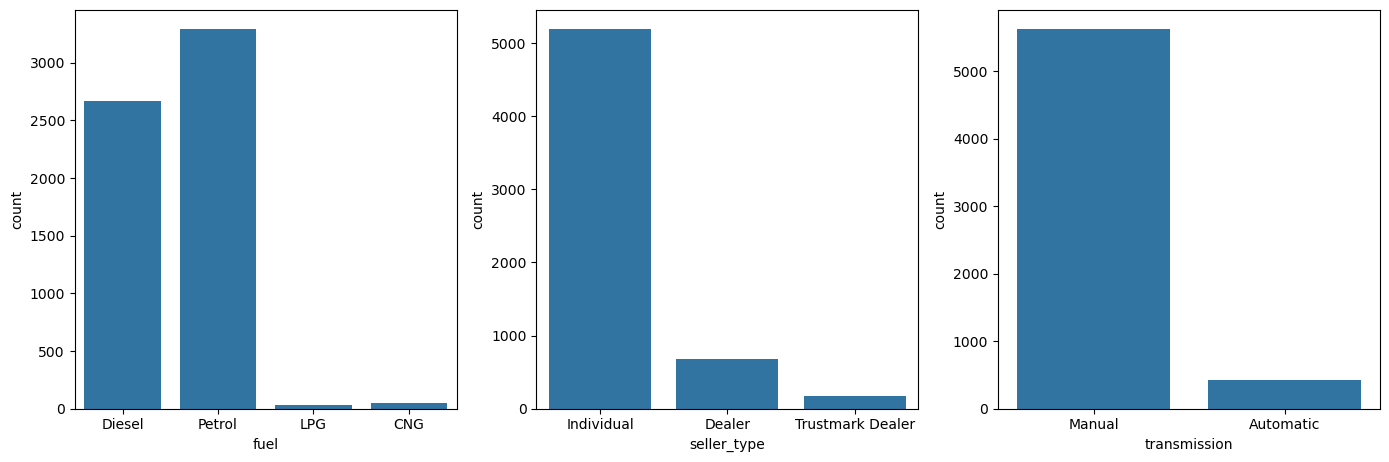

In [27]:
plt.figure(figsize=(14,18))
cat_cols= [feature for feature in categorical_columns if feature != 'name' and feature != 'owner']
for i,feature in enumerate(cat_cols):
    if feature != 'name':
        plt.subplot(4,3,i+1)
        sns.countplot(data=dataframe,x=feature)
        
      
        plt.tight_layout()

### The above countplot for categorical datset also shows
- counts/numbers of each unique values associated with each column
- shows most important dataset in each column and many more

<Axes: xlabel='owner', ylabel='count'>

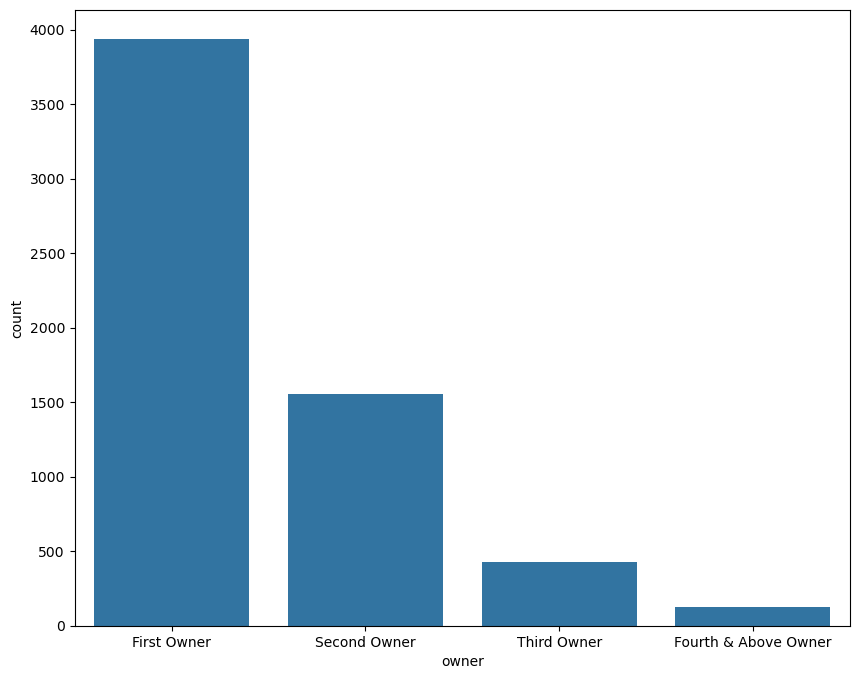

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataframe,x='owner')

-  The above count plot  also shows distribution of each unique categories in column categorical dataset

In [29]:
categorical_columns['name'].nunique()

2058

#### As we see,we saw countplot of other columns but for name columns as there are huge numbers of unique values in it,it is difficult to plot them in bargraph as above.So lets only see countplot for 10  most famous values of name column for their analysis 

<Axes: title={'center': 'Top 10 Car Names'}, xlabel='count', ylabel='name'>

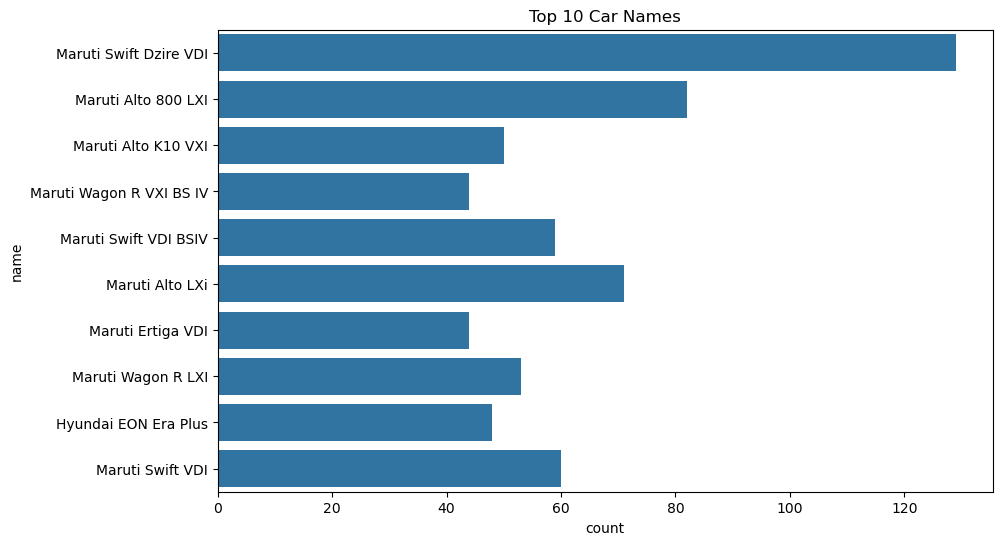

In [30]:
top_names =dataframe['name'].value_counts().nlargest(10).index
names_to_plot =dataframe[dataframe['name'].isin(top_names)]
plt.figure(figsize=(10,6))
plt.title("Top 10 Car Names")
sns.countplot(data=names_to_plot,y='name')



### Lets check the distibution of dataset in percentage using piechart

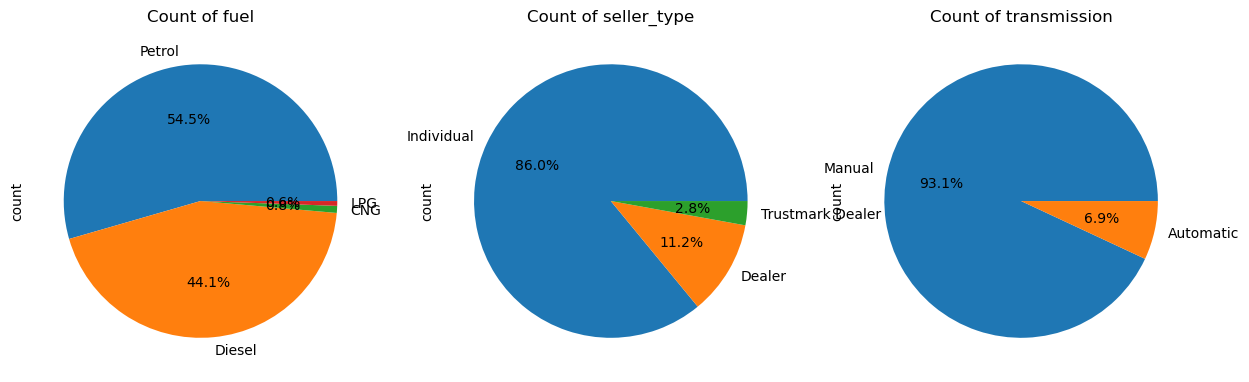

In [31]:
plt.figure(figsize=(15,5))
for i,feature in enumerate(cat_cols):
   
        plt.subplot(1,3,i+1)
        dataframe[feature].value_counts().plot(kind='pie',autopct='%1.1f%%')
        plt.title(f'Count of {feature}')
    


<Axes: ylabel='count'>

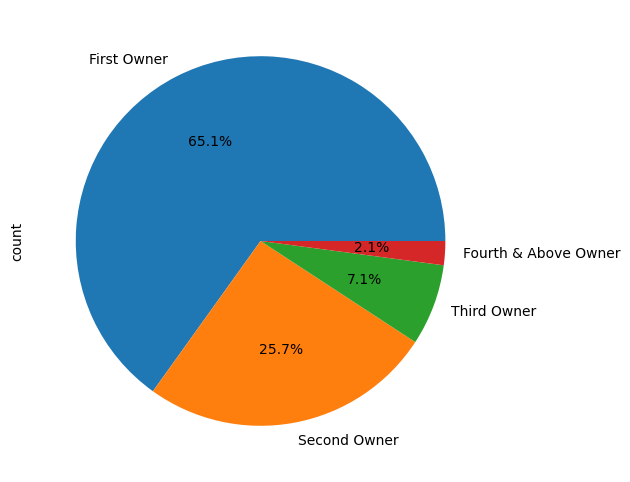

In [32]:
plt.figure(figsize=(10,6))
dataframe['owner'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<Axes: ylabel='count'>

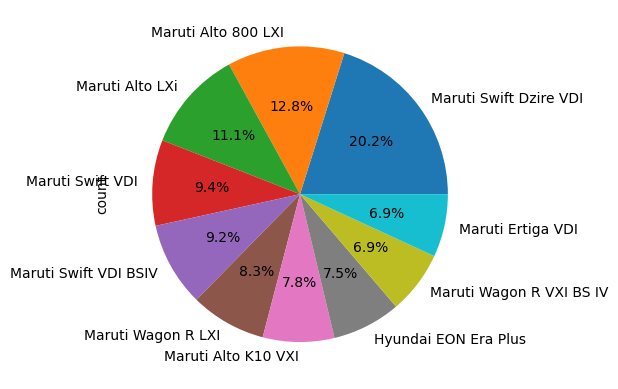

In [33]:
names_to_plot['name'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Now let's perform bivariate/multivariate analysis 

- lets perform scatterplot analysis

In [34]:
dataframe.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

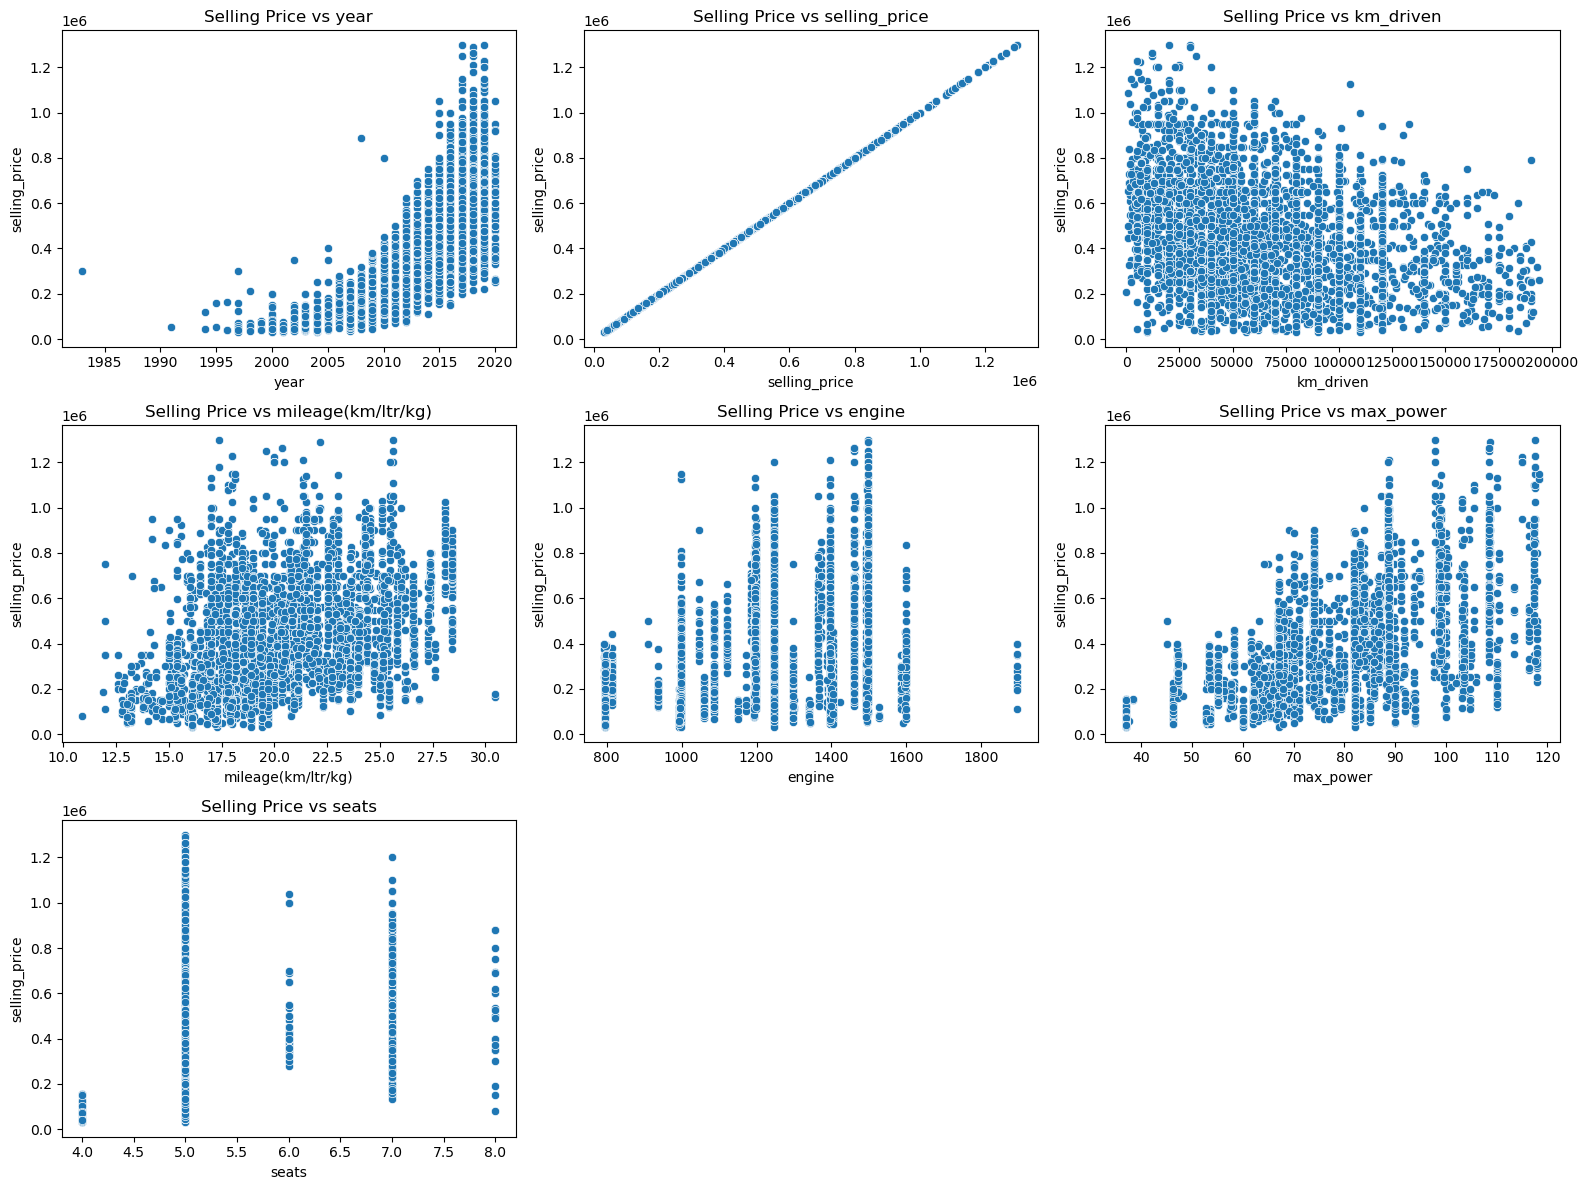

In [35]:
plt.figure(figsize=(16,12))
for i,feature in  enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=dataframe,x=feature,y='selling_price')
    plt.title(f"Selling Price vs {feature}")
plt.tight_layout()

- The above mentioned different diagrams illustrates the relationship between different numerical based column datset vs target column(selling_price)

#### for categorical vs target variables ,use box plot 

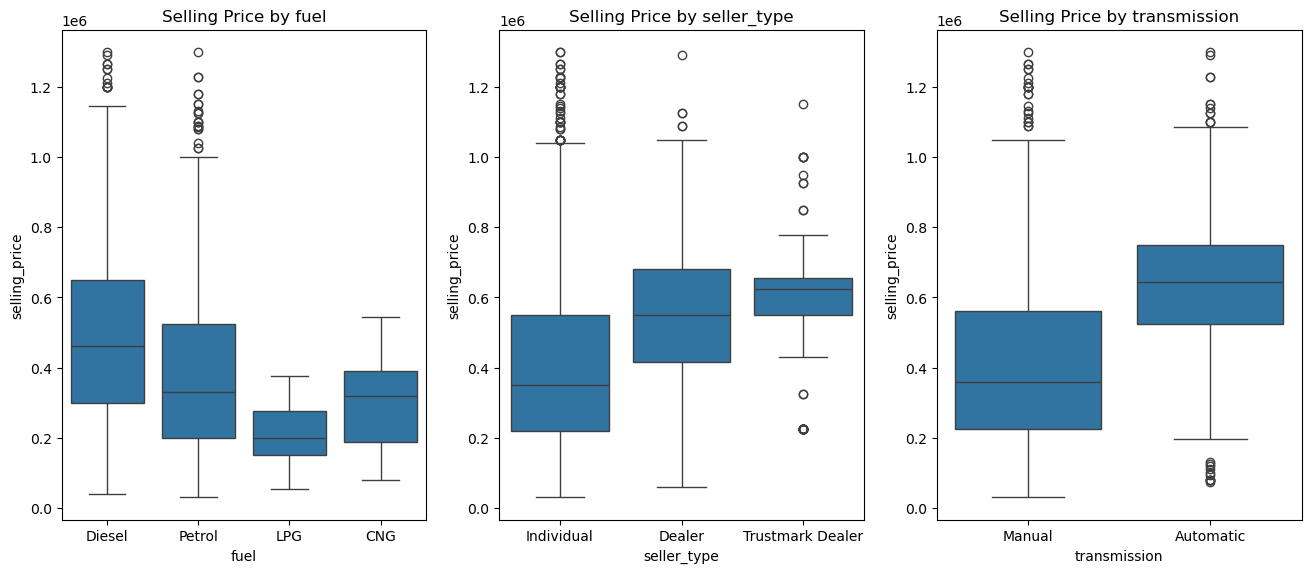

In [36]:

plt.figure(figsize=(16,14))
for i,cols in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=dataframe,x=cols,y='selling_price')
    plt.title(f"Selling Price by {cols}")

### The above box plot helps to show relationship between categorical columns datasets vs target(numerical-selling_price) dataset.
- shows which unique value has high price like diesel based car are more expensive relatively in comparision to others and so on
- also shows unexpected high selling price or low selling price within that unique value (like selling price of automatic car is unexpectedly sold to high/low prices as outliers present)

####  Its not possible to display all nunique values present in name column,so again top 10 values in it should only be plotted

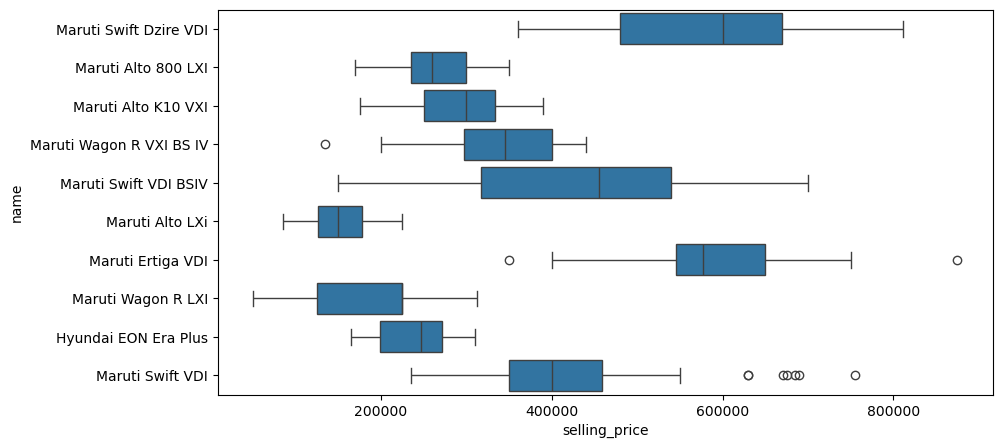

In [37]:
# plt.figure(figsize=(10,5))
top_names
# names_to_plot['name'].values
names_to_plot['name'].unique()
plt.figure(figsize=(10,5))
sns.boxplot(data=names_to_plot,y='name',x='selling_price')
plt.show()

### Now lets check corelation between respective columns

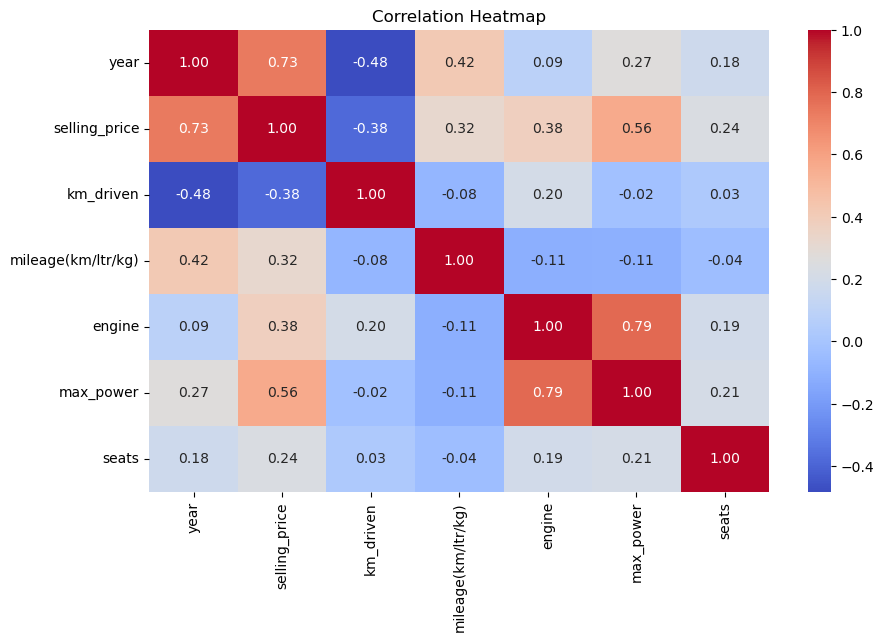

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### The above heatmap helps to show corelation between different  numerical features.like how much they are corelated to each others.Also helps in determing highly corelated features and only training those columns on suitable purpose.

### LLM Guidance
- For EDA, mostly in columns like name,which has more than 2000 unique values ,the plotting and comparing it was extremely difficult to cover all unique data and find their relationship with other columns and fine insights,so Chatgpt assist me for only find insights for 10 most common name and use them to visulalise.
- and it also helps me choosing right relationship between columns and which graph will help me finding proper insights from those datasets.


In [39]:
## Left blank to divide the another section

## Feature Engineering

### Now lets try to create useful features  

In [40]:
dataframe['car_age']=2025-dataframe['year']
dataframe['power_per_cc']=dataframe['max_power']/dataframe['engine']
dataframe.drop('year',axis=1,inplace=True)
dataframe.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,power_per_cc
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,0.059295
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,0.069105
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,0.052104
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,0.064470
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,0.067951


In [41]:
dataframe['brand']=dataframe['name'].str.split().str[0]
dataframe.drop('name',axis=1,inplace=True)

In [42]:
a=dataframe['brand'].unique()
print(a)
dataframe.head()

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Volkswagen' 'Nissan' 'Daewoo' 'Kia'
 'Opel' 'BMW' 'Peugeot']


,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,power_per_cc,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,0.059295,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,0.069105,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,0.052104,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,0.064470,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,0.067951,Maruti


In [43]:
dataframe['owner'] = dataframe['owner'].astype(str).str.strip().str.title()

#### for owner lets do ordinal encoding

In [44]:

owner_map ={
    'First Owner':1,
    'Second Owner':2,
    'Third Owner':3,
    'Fourth & Above Owner':4  
}

dataframe['owner']=dataframe['owner'].map(owner_map)


In [45]:
dataframe['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [46]:
dataframe.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,power_per_cc,brand
0,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0,11,0.059295,Maruti
1,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0,11,0.069105,Skoda
2,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0,19,0.052104,Honda
3,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0,15,0.064470,Hyundai
4,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0,18,0.067951,Maruti


#### Lets now do one hot encoding for categorical columns

In [47]:
categorical_columns=dataframe.select_dtypes(include='object')
# categorical_columns.columns
dataframe=pd.get_dummies(dataframe,columns=categorical_columns.columns,drop_first=True)

In [48]:
print(dataframe.shape)
dataframe.columns

(6047, 33)


Index(['selling_price', 'km_driven', 'owner', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats', 'car_age', 'power_per_cc', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Kia',
       'brand_Mahindra', 'brand_Maruti', 'brand_Nissan', 'brand_Opel',
       'brand_Peugeot', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen'],
      dtype='object')

### Now split the data into training and test dataset

In [49]:
X =dataframe.drop('selling_price',axis=1)
y=dataframe['selling_price']


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Use of LLM for Feature Engineering
- LLM assist me in generating new useful features for training like car age,power_per cc and also remove some columns like 'year' .
- LLM also assist me in creating new column like brand and removing name columns,so analysis can be done more properly. The more unique values of name columns have no significance,so created new column with their brand representation.

In [50]:
## Left blank for another section

## Model Training

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error,mean_absolute_error,r2_score

## Random Forest Regressor

In [52]:
model=RandomForestRegressor(random_state=42,n_estimators=100)
model.fit(X_train,y_train)




RandomForestRegressor(random_state=42)

In [53]:
y_predict=model.predict(X_test)
rms_value = np.sqrt(mean_squared_error(y_test,y_predict))
mae_value=mean_absolute_error(y_test,y_predict)
r2_value= r2_score(y_test,y_predict)


In [54]:
print(rms_value,mae_value,r2_value)

66157.73311391711 45901.06095750898 0.916041948036402


## Lets apply Fine tuning to it


In [55]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

#### Here ,we used GridSearchCV for fine tuning
- we choose intervals for different parameters as above to find best parameters to fit our model

In [56]:
best_model=grid_search.best_estimator_

# Evaluating

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


##### Here,our parameters for best fit model is find out by best_estimator_ and assigned accordingly.then we can predict and calculate evalutaion metrics accordingly

In [57]:
#Best model results
print("AFTER FINE TUNING ")
print("Best Params:", grid_search.best_params_)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

AFTER FINE TUNING 
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 65871.7061952029
MAE: 46050.00365361722
R²: 0.9167663486480914


### Final comparision

In [58]:

df = pd.DataFrame({
    'RMSE': [rms_value, rmse],
    'MAE': [mae_value, mae],
    'R²': [r2_value, r2]
}, index=['Before Tuning', 'After Tuning'])
print(df)

                       RMSE           MAE        R²
Before Tuning  66157.733114  45901.060958  0.916042
After Tuning   65871.706195  46050.003654  0.916766


In [59]:
X_train.columns

Index(['km_driven', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age', 'power_per_cc', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Kia', 'brand_Mahindra', 'brand_Maruti',
       'brand_Nissan', 'brand_Opel', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen'],
      dtype='object')

##### Finding Feature Importances

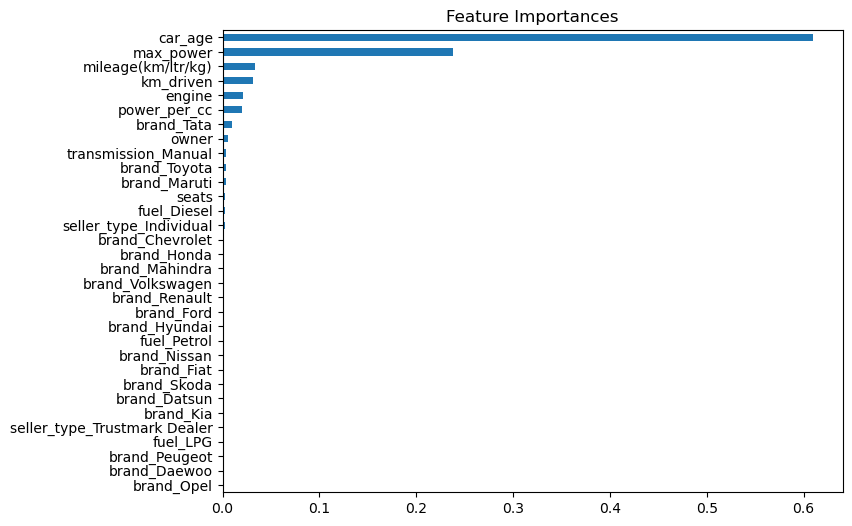

In [60]:
importances = best_model.feature_importances_
features = X_train.columns

# Plot
pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances")
plt.show()



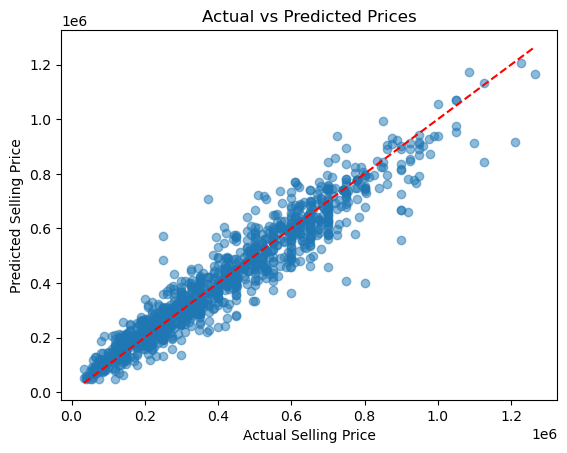

In [61]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [62]:
print("Mean Selling Price:", y.mean())
print("Median Selling Price:", y.median())


Mean Selling Price: 419155.1713246238
Median Selling Price: 385000.0


## XGB Boost Regressor

In [63]:
! pip install xgboost

In [64]:
from xgboost import XGBRegressor

xgb =XGBRegressor(random_state=42,n_estimators=200,max_depth=6,learning_rate=0.1)
xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
y_pred_xgb=xgb.predict(X_test)

# Evaluate 
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [66]:
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R²: {r2_xgb}")


XGBoost RMSE: 64052.39828827537
XGBoost MAE: 46192.8157928719
XGBoost R²: 0.9213005304336548


### Fine tuning on XGB Regressor

In [67]:
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = xgb.XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred_best = best_xgb.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


#### Similarly as above model we used here also GridSearchCV for fine tuning and finding best parameters

In [68]:
# Evaluation 
print("Best Params:", grid_search.best_params_)
print(f"Tuned XGBoost RMSE: {rmse_best}")
print(f"Tuned XGBoost MAE: {mae_best}")
print(f"Tuned XGBoost R²: {r2_best}")


Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost RMSE: 63106.68473520836
Tuned XGBoost MAE: 45442.35373192149
Tuned XGBoost R²: 0.9236072897911072


 ### Final comparision

In [69]:
df1 = pd.DataFrame({
    'RMSE': [rmse_xgb, rmse_best],
    'MAE': [mae_xgb, mae_best],
    'R²': [r2_xgb, r2_best]
}, index=['Before Tuning', 'After Tuning'])
print(df1)

                       RMSE           MAE        R²
Before Tuning  64052.398288  46192.815793  0.921301
After Tuning   63106.684735  45442.353732  0.923607


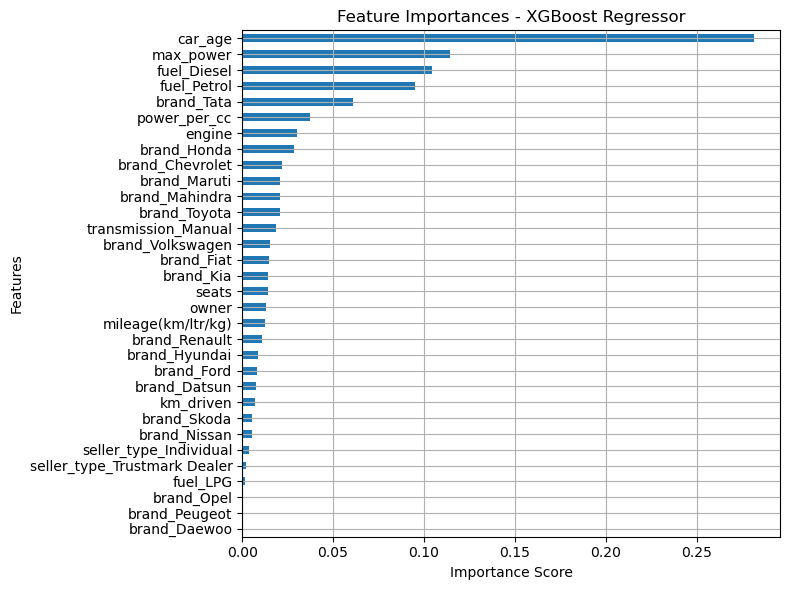

In [70]:


# Feature importances from the trained XGBoost model
importances = best_xgb.feature_importances_
features = X_train.columns  # Make sure X_train and best_xgb are defined

# Plot feature importance
pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances - XGBoost Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


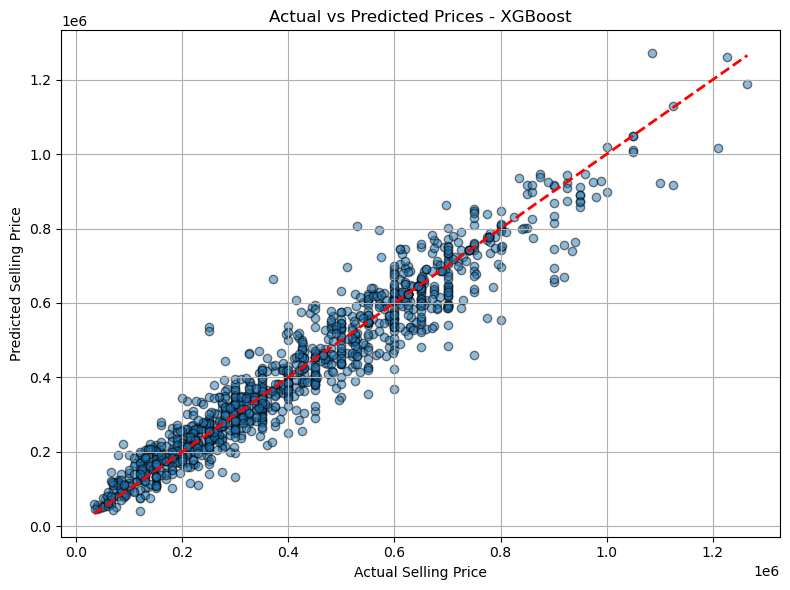

In [71]:


# Predict using the best XGBoost model
y_pred = best_xgb.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices - XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


## Use of LLM in model training and fine tuning purpose
- take help for finding good model as per my datasize and its behaviours(like present of outliers).
- I asked chatgpt for various parameters in GridCV for fine tuning purpose and finding best parameters for model for good accuracy.
- I provided mean,median values for target columns and predict rmse,ame,r_sq to find best model,know how well it is performing.
- Asked assist from LLMs if i should only use most important columns to train dataset(by removing more) and see,but it doesnt work quite good.
- assist in plotting datasets for finding actual vs predicted target values in scatterplot to see how good it is performing.

### Furthermore,
- I tried to fit model by removing outliers and without,by removing outliers my model did pretty good work,so it assures me that outliers are not good in my dataset for training purpose.


In [72]:
## Left blank

## DUMMY REGRESSOR

## Lets use Dummy Regressor to evaluate

In [73]:
from sklearn.dummy import DummyRegressor



# Create dummy model that always predicts the mean selling price
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)

# Evaluate
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_dummy))
mae_dummy = mean_absolute_error(y_test, y_dummy)
r2_dummy = r2_score(y_test, y_dummy)

print("Dummy Regressor (Mean) Results:")
print(f"RMSE: {rmse_dummy}")
print(f"MAE: {mae_dummy}")
print(f"R²: {r2_dummy}")


Dummy Regressor (Mean) Results:
RMSE: 228365.65681702748
MAE: 191795.67754311208
R²: -0.00037471561994584235


### The above value shows our model is learning properly and not guessing values like done by Dummy Regressor with strategy mean.

### USE OF LLMs:
- I provided R_sq values of Dummy Regressor,to take idea of what it is representing,and other values too.
- It helps me guranting that my model is predicting right and don't predict as like just guessing ,it has learnt properly.

In [74]:
# Left blank

## Finally,as we saw from above metrics,XGB Regressor model is best to use. Let's save it

In [75]:
import joblib
joblib.dump(best_xgb,'model.pkl')

['model.pkl']